# New Section

In [ ]:
# ✅ STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# ✅ STEP 2: Install dependencies
!pip install librosa soundfile tqdm


In [ ]:
# ✅ STEP 3: Imports
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models


In [ ]:
!ls "/content/drive/MyDrive/Collab Notebooks/Audio Emotion Recognition Project/"


ls: cannot access '/content/drive/MyDrive/Collab Notebooks/Audio Emotion Recognition Project/': No such file or directory


In [ ]:
!ls "/content/drive/MyDrive"


 14630_Form16.gdoc
 14630_Form16.pdf
 15613091836185765912834788323750.jpg
 15613091997652101110411243497940.jpg
 1615982126650_Book1.gsheet
'Appointment_Letter_Sanjay Nair_29-Dec-2022_03-36.pdf.pdf'
 Aurangabad
 BLACKBOOK.gdoc
 Books
 CCP_Programs_with_Solutions.pdf
'Colab Notebooks'
'Cover_letter (1).pdf'
 Cover_letter.gdoc
 Cover_letter.pdf
'Data science proj'
 DATAST3_.CPP
 DSP-20.pdf
'dsp project'
 dubaiautodrome-ticket_copy.pdf
'Extra ML links.txt'
'Final Project'
'GroupM '
'https:  global..txt'
 IMG_20200617_223954.jpg
 IMG_20200617_224034.jpg
 IMG_20200617_224058.jpg
 IMG20200630204813.jpg
 inbound4832233849961105464.pdf
'Matt Abrahams - Think Faster, Talk Smarter (2023, Pan Macmillan UK) - libgen.li.epub'
'MLP-IBM-Certificate-20(1).pdf'
'Music Website final'
 passport.pdf
 sanjay_as
 Sanjay_Nair_8806451291_-1.docx
 Sanjay_Nair_91-8806451291_DXB.docx
'Sanjay_Nair CV_2022.docx'
 Sanjay_Nair_CV.pdf
 Sanjay_Nair_UAE.pdf
 sask
'Scan Oct 24, 2019.pdf'
 Scikit-Learn-Infographic.pdf
'

In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks"

'Audio Emotion Recognition Project'   Untitled0.ipynb


In [ ]:
# ✅ STEP 4: Define your RAVDESS folder path (adjust if needed)

folder_path = '/content/drive/MyDrive/Colab Notebooks/Audio Emotion Recognition Project/'

# Emotion code mapping
emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}


In [ ]:
# ✅ STEP 5: Feature Extraction
X, y = [], []

def extract_features(file_path, max_len=128):
    audio, sr = librosa.load(file_path, sr=None)
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
    log_mel = librosa.power_to_db(mel_spec, ref=np.max)
    if log_mel.shape[1] < max_len:
        pad_width = max_len - log_mel.shape[1]
        log_mel = np.pad(log_mel, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        log_mel = log_mel[:, :max_len]
    return log_mel

# ✅ STEP 6: Loop through audio files
for file in tqdm(os.listdir(folder_path)):
    if file.endswith('.wav'):
        emotion_code = file.split('-')[2]
        label = emotion_map.get(emotion_code)
        if label:
            path = os.path.join(folder_path, file)
            features = extract_features(path)
            X.append(features)
            y.append(label)

X = np.array(X)
y = np.array(y)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)


100%|██████████| 1014/1014 [02:17<00:00,  7.37it/s]


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Add channel dimension for CNN: (samples, 128, 128, 1)
X_reshaped = X[..., np.newaxis]

# One-hot encode labels
y_cat = to_categorical(y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_cat, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Number of classes:", y_cat.shape[1])


Training data shape: (809, 128, 128, 1)
Testing data shape: (203, 128, 128, 1)
Number of classes: 6


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(y_cat.shape[1], activation='softmax')  # output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,838 (12.61 MB)

 Trainable params: 3,304,838 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)


Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 585ms/step - accuracy: 0.1621 - loss: 22.9585 - val_accuracy: 0.1773 - val_loss: 1.7741
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 600ms/step - accuracy: 0.1959 - loss: 1.7739 - val_accuracy: 0.1872 - val_loss: 1.7582
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 650ms/step - accuracy: 0.2224 - loss: 1.7449 - val_accuracy: 0.3054 - val_loss: 1.6825
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 610ms/step - accuracy: 0.3168 - loss: 1.6459 - val_accuracy: 0.2512 - val_loss: 1.6238
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 612ms/step - accuracy: 0.3627 - loss: 1.5408 - val_accuracy: 0.3005 - val_loss: 1.5713
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 649ms/step - accuracy: 0.4028 - loss: 1.4576 - val_accuracy: 0.3547 - val_loss: 1.5599
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 572ms/step - accuracy: 0.4144 - loss: 1.4133 - val_accuracy: 0.3448 - val_loss: 1.5251
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 570ms/step - accuracy: 0.4536 - loss: 1.3238 - val_acc

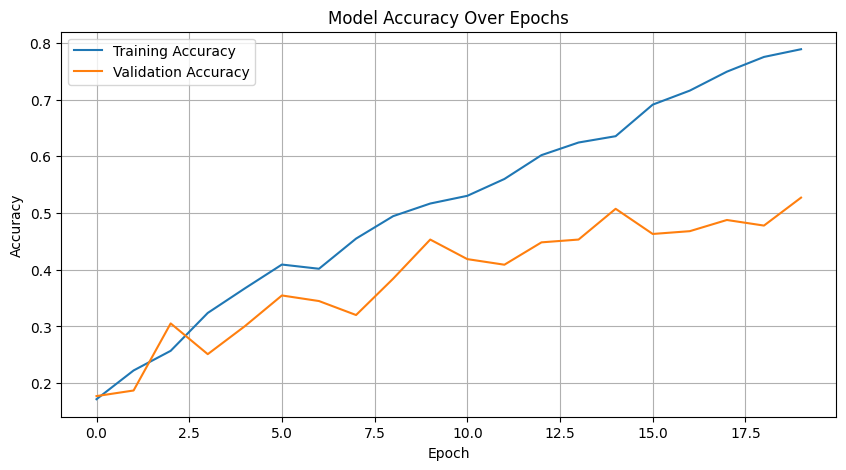

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 286ms/step
              precision    recall  f1-score   support

       angry       0.50      0.64      0.56        36
        calm       0.53      0.62      0.57        34
     fearful       0.69      0.62      0.65        39
       happy       0.42      0.37      0.39        38
     neutral       0.50      0.35      0.41        20
         sad       0.51      0.50      0.51        36

    accuracy                           0.53       203
   macro avg       0.52      0.52      0.52       203
weighted avg       0.53      0.53      0.52       203



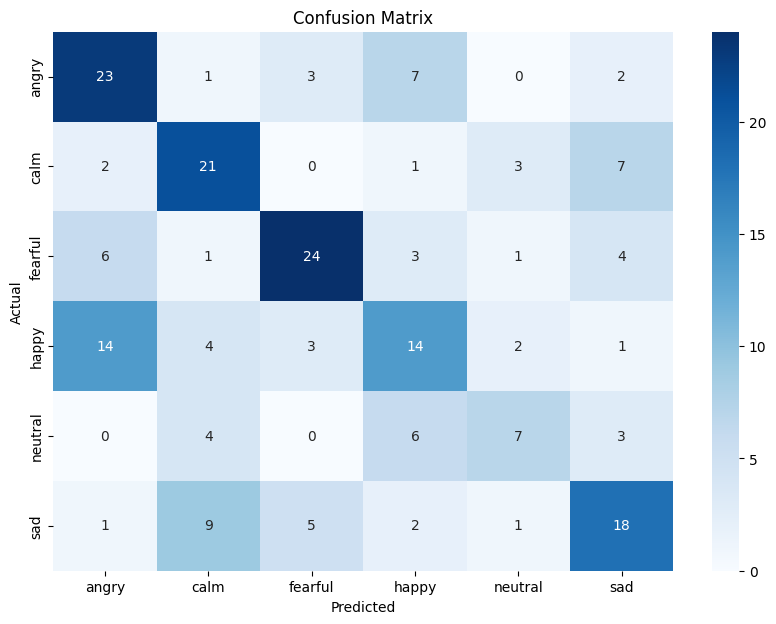

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert back to class labels
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Label names
labels = encoder.classes_

# Classification report
print(classification_report(y_true, y_pred, target_names=labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
model.save("/content/drive/MyDrive/audio_emotion_model.h5")


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/audio_emotion_model.h5")


In [ ]:
import tensorflow as tf
print(tf.__version__)
model = tf.keras.models.load_model('audio_emotion_model.h5')

2.18.0


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'audio_emotion_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)